In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# 데이터셋 생성

In [58]:
import os

target = 'Motorcycle'

folders = os.listdir('./images')
folders.remove(target)
folders.remove('Other')

files = os.listdir(f'./images/{target}')
length = len(files)

X = np.empty((length*2, 64, 64, 3))
Y = np.empty((length*2,))

for i in range(length):
    x = cv2.imread(f"./images/{target}/{files[i]}")
    X[i] = cv2.resize(x, (64, 64))
    Y[i] = 1

for f in range(7):
    files = os.listdir(f'./images/{folders[f]}')
    for i in range(length//10):
        x = cv2.imread(f"./images/{folders[f]}/{files[i]}")
        X[length + length//10*f + i] = cv2.resize(x, (64, 64))
        Y[length + length//10*f + i] = 0

files = os.listdir('./images/Other')
for i in range(length - length//10*7):
    x = cv2.imread(f"./images/Other/{files[i]}")
    X[i+length+length//10*7] = cv2.resize(x, (64, 64))
    Y[i+length+length//10*7] = 0

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)
print( y_train.shape)
print(y_test.shape)

(729, 64, 64, 3)
(243, 64, 64, 3)
(729,)
(243,)


# 모델 생성

In [61]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(1024, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=[
        'accuracy',
    ],
)

In [63]:
modelpath=f"./history/{target.lower()}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5)

In [65]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=100, verbose='auto', callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 0.6398 - accuracy: 0.6154
Epoch 1: val_accuracy did not improve from 0.74317
6/6 [==============================] - 5s 859ms/step - loss: 0.6398 - accuracy: 0.6154 - val_loss: 0.6351 - val_accuracy: 0.5683
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.6054 - accuracy: 0.6758
Epoch 2: val_accuracy did not improve from 0.74317
6/6 [==============================] - 5s 828ms/step - loss: 0.6054 - accuracy: 0.6758 - val_loss: 0.6861 - val_accuracy: 0.6120
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.5835 - accuracy: 0.7125
Epoch 3: val_accuracy improved from 0.74317 to 0.74863, saving model to ./history\motorcycle.hdf5
6/6 [==============================] - 5s 840ms/step - loss: 0.5835 - accuracy: 0.7125 - val_loss: 0.5428 - val_accuracy: 0.7486
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.5447 - accuracy: 0.7418
Epoch 4: val_accuracy improved from 0.74863 t

In [66]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 63ms/step - loss: 0.5717 - accuracy: 0.8436


[0.5716565251350403, 0.8436213731765747]

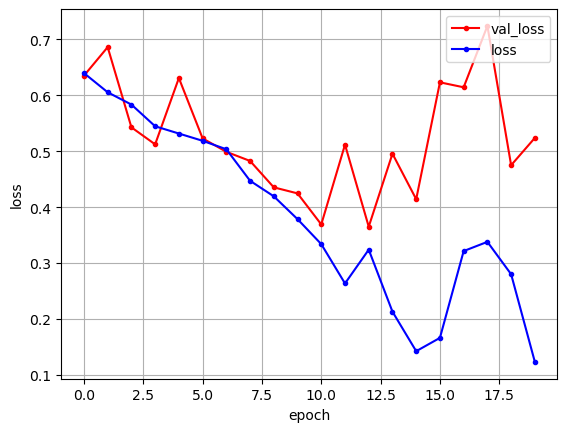

In [67]:
val_loss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='val_loss')
plt.plot(x_len, loss, marker='.', c="blue", label='loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

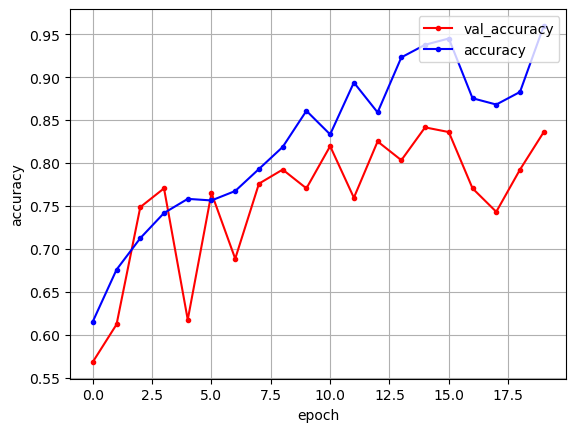

In [68]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

x_len = np.arange(len(accuracy))
plt.plot(x_len, val_accuracy, marker='.', c="red", label='val_accuracy')
plt.plot(x_len, accuracy, marker='.', c="blue", label='accuracy')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model.save(f"./models/{target.lower()}.hdf5")